# PROYECTO EDA - EXPLORATORY DATA ANALYSIS
### Analisis dataset Big Startups

##### Chiara Totaro

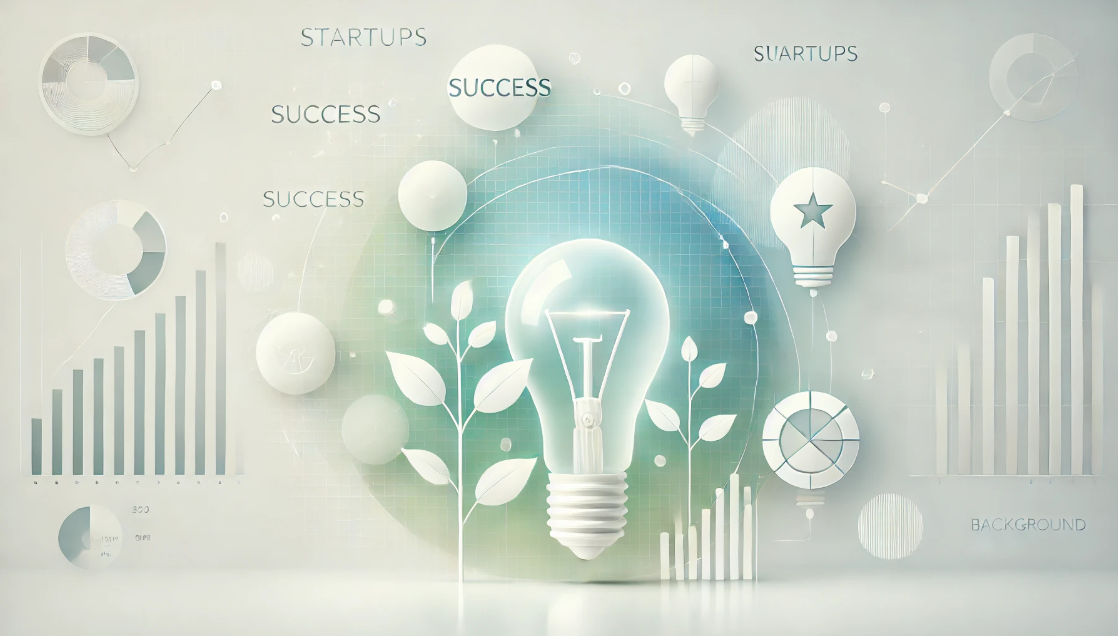

##### INFO DATASET
**Dataset:**  big-startup-secsees-fail-dataset.csv from Crunchbase

**Descripción:** Dataset de todas las grandes startups, con informacion de status, fecha de creacion y rondas de financionacion, ubicacion.

**Periodo:**  Foto global (hasta 2015) 

### #0 IMPORT LIBRERIAS

### #1 LOAD DATA

### #2 EDA - Preprocessing

Información básica del DataFrame:
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns)

##### #2.0 DROP COLUMNAS IRRELEVANTES
Información básica del DataFrame despues eliminacion de columnas irrelevantes
RRangeIndex: 66368 entries, 0 to 66367
Data columns (total 11 columns)

#### #2.1 ANALISIS MISSING y TRANSFORMACION

Tabla de variables iniciales, con cantidad y porcentaje de missing y tipo antes del procesamiento y limpieza

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Descripción</th>
      <th>Valores totales</th>
      <th>Tipo</th>
      <th>Valores faltantes</th>
      <th>Porcentaje faltante (%)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>name</th>
      <td>Nombre de la startup</td>
      <td>66367</td>
      <td>object</td>
      <td>1</td>
      <td>0.001507</td>
    </tr>
    <tr>
      <th>category_list</th>
      <td>lista de categorías donde opera</td>
      <td>63220</td>
      <td>object</td>
      <td>3148</td>
      <td>4.743250</td>
    </tr>
    <tr>
      <th>funding_total_usd</th>
      <td>Financiacion total recibida (en dolares estadunidenses)</td>
      <td>66368</td>
      <td>object</td>
      <td>0</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>status</th>
      <td>Indica si la compañia sigue operativa o no, o si ha tenido exito saliendo en bolsa o siendo adquirida</td>
      <td>66368</td>
      <td>object</td>
      <td>0</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>country_code</th>
      <td>Codigo del pais -segun iso_alpha3-</td>
      <td>59410</td>
      <td>object</td>
      <td>6958</td>
      <td>10.483968</td>
    </tr>
    <tr>
      <th>region</th>
      <td>Indica la region donde se ha creado la startup</ts>
      <td>58338</td>
      <td>object</td>
      <td>8030</td>
      <td>12.099204</td>
    </tr>
    <tr>
      <th>city</th>
      <td>Indica la region donde se ha creado la startup</td>
      <td>58340</td>
      <td>object</td>
      <td>8028</td>
      <td>12.096191</td>
    </tr>
    <tr>
      <th>funding_rounds</th>
      <td>Numeros de rondas de financiacion</td>
      <td>66368</td>
      <td>int64</td>
      <td>0</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>founded_at</th>
      <td>Fecha de creacion</td>
      <td>51147</td>
      <td>object</td>
      <td>15221</td>
      <td>22.934245</td>
    </tr>
    <tr>
      <th>first_funding_at</th>
      <td>Fecha de primera ronda de financiacion</td>
      <td>66344</td>
      <td>object</td>
      <td>24</td>
      <td>0.036162</td>
    </tr>
    <tr>
      <th>last_funding_at</th>
      <td>Fecha de la ultima ronda de financiacion recibida</td>
      <td>66368</td>
      <td>object</td>
      <td>0</td>
      <td>0.000000</td>
    </tr>
  </tbody>
</table>
</div>

##### 2.1.0 ANALISIS MISSING en *name*
 - name tiene un missing, que contiene datos en las otras columnas : asigno un nombre aleatoria a la startup sin nombre

##### 2.1.1 ANALISIS MISSING y TRANSFORMACION FECHAS *founded_at* y *first_funding_at*

MISSING 
Los missing values de founded_at faltantes son el 22.9% del total, de fist_founding_at del 0.03%
 - los nulos no coinciden, es decir cuando no hay valor en founded_at, los hay en first_funding_at y viceversa --> 
    - sustituyo los valores missing de first_funding_at en founding_at y viceversa
 - Solo quedan 3 valores con nulos coincidentes, los elimino.


TRANFORMACION 
- Conversion de las fechas en Datetime
- Creacion de la columna *founded_at_year* (int) para mejor manejo para futuras analisis

- SLICING fechas :
  - elimino fechas superiores a 2025 --> elimino posibles anomalias
  - Decido eliminar las startup con fechas de creacion anterior al año 1980 para un mejor analisis comparando contextos economicos mas recientes


##### 2.1.2 ANALISIS MISSING y TRANSFORMACION en *country_code*

Country_code utiliza el codigo iso alpha3

MISSING
 - Los missing en country_code corresponden a un 10% 
 - Coinciden tambien con los Nan de Region y city, con lo cual no tengo mas informacion para saber que valor attribuirle.
   - Decido eliminarlos

TRANSFORMACION
 - Creo una nueva columna *country* agrupando valores segun continente: 
   - USA
   - EU (agrupo todos los codigos de los paises de EU)
   - RDM Resto del Mundo : todos los restantes

  - De esta manera baja la cardinalidad de country y la puedo considerar variable categorica para futuras analisis
   

#### 2.1.3 ANALISIS MISSING y TRANSFORMACION en *region* y *city*

TRANSFORMACION
  - region y city nos dan la misma info (el 90% de los valores coindice totalmente), puedo agruparla y eliminar la columna city
   - Elimino la columna City y renombro la columan region : *region_city*

MISSING
 - Region y City tienen mismo % de missing : 12%
 - sostituyo los valores valores nulos en region_city y asigno la ciudad que corresponde a la moda del pais country_code

#### 2.1.4 ANALISIS MISSING *category_list*

MISSING
 - El campo category_list presenta un 2.6%  de missing, le asigno "Other" 

TRANSFORMACION
 - Siendo el campo una lista de valores, La columna category_list contiene valores con varios campos, separados por | 
 - Para simplificar, creo una columna llamada *sector*, suponiendo que la primera descripción en la category_list se refiere a la categoría principal.
   - Se reduce la cardinalidad de category de un 41%  al 1,2%

#### 2.6 ANALISIS *funding_total_usd*

funding_total_usd es el total de financiamiento en dólares estadounidenses que ha recibido cada startups

TRANSFORMACION
 - Es de tipo str, lo transformo en numerico float.
 - los datos de la columnas funding_total_usd presentan una gran disparidad de valores, desde 1 hasta orden e+10. Ademas presentan una distribucion muy sesgada. 
 Para hacer los datos más manejables, y para la succesiva analisis visual, TRANSFORMO estos datos numéricos usando logaritmos en base 10 --> creacion de la columna : *funding_log*

MISSING
 - parece no haya NaN, pero despues de la transformacion en float, habia valores "-" que he transformado en NaN --> porcentaje de missing es del 17,5% (). Los elimino


## DATASET LIMPIO !!!!

#### TABLA DE DESCRIPCION DE LAS COLUMNAS DEL DATASET LIMPIO y con SLICING de los datos que vamos a analizar

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Valores totales</th>
      <th>Tipo</th>
      <th>Valores faltantes</th>
      <th>Porcentaje faltante (%)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>name</th>
      <td>38796</td>
      <td>object</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>category_list</th>
      <td>38796</td>
      <td>object</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>funding_total_usd</th>
      <td>38796</td>
      <td>float64</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>status</th>
      <td>38796</td>
      <td>object</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>country_code</th>
      <td>38796</td>
      <td>object</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>region_city</th>
      <td>38796</td>
      <td>object</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>funding_rounds</th>
      <td>38796</td>
      <td>int64</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>founded_at</th>
      <td>38796</td>
      <td>datetime64[ns]</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>first_funding_at</th>
      <td>38796</td>
      <td>datetime64[ns]</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>last_funding_at</th>
      <td>38796</td>
      <td>datetime64[ns]</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>founded_at_year</th>
      <td>38796</td>
      <td>int64</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>country</th>
      <td>38796</td>
      <td>object</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>sector</th>
      <td>38796</td>
      <td>object</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>funding_log</th>
      <td>38796</td>
      <td>float64</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>
</div>

DEFINICION DE VARIABLES TARGET A ANALIZAR 

CARDINALIDAD y TIPIFICACION 

### #3 Análisis Univariante : Visual y numerica
  - Categoricas : Moda, Frequencias (Absolutas y Relativas)
  - Numericas : Tendencias Central (mediana, media), rangos, posicion(percentiles-quartiles, IQR, CV), distribucion (histograma, densidad probabilidad)

#### #3.1 Análisis Univariante : Categoricas
 - defino variables categoricas que quiero analizar:
  - Tanto la frequecia absoluta como la frequencias relativas nos enseñas que del total del dataset :
   -- la mayoria (65%) de las startups se encuentra en USA
   -- el 61% sigue operativa, el 12% ha tenido exito siendo acquirida o ha realizado una IPO, el 7% ha fracasado.

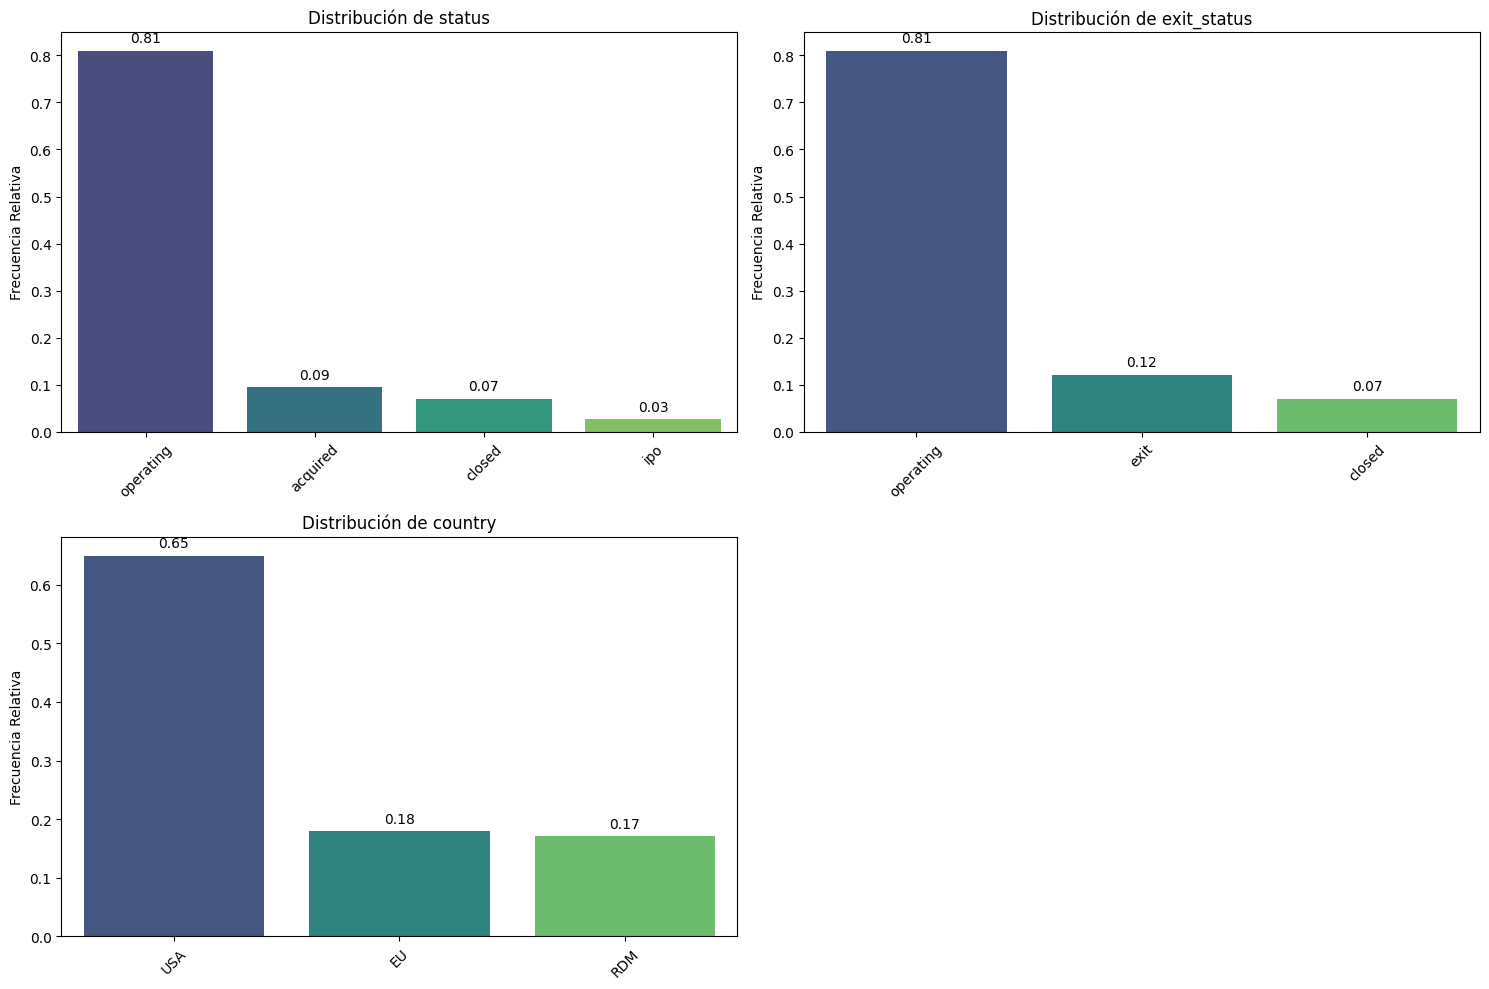

##### ANALISIS paises donde mas startup se han creado
 - Numero de paises donde se han creado startups:  123
 - Paises con mas de 100 startup:  27

Distribucion de startups por paises - primeros 20 -
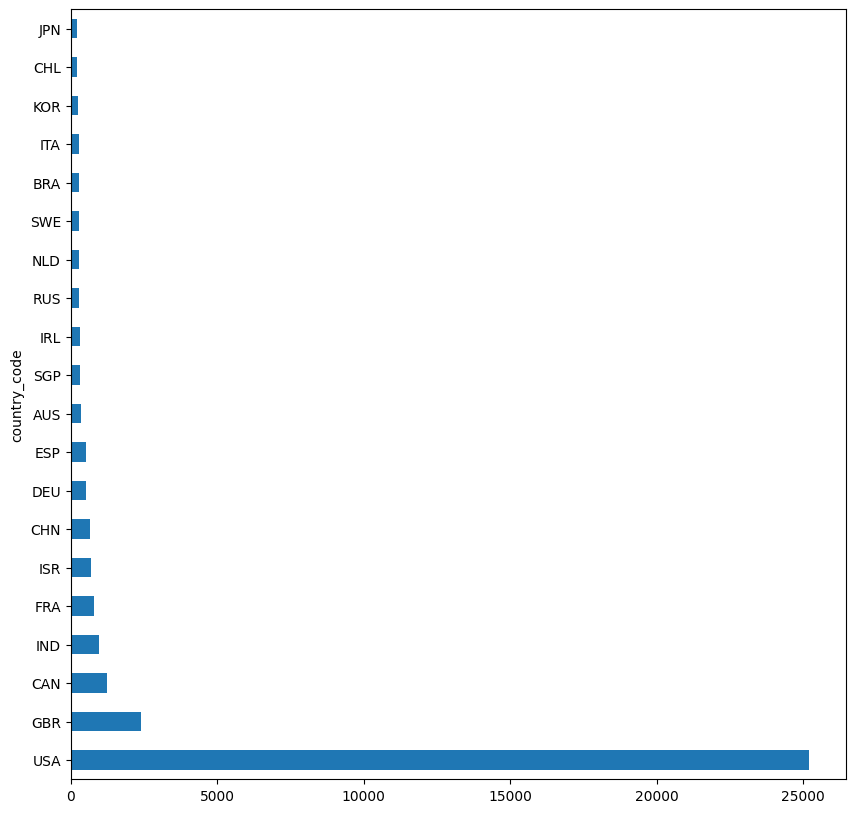

##### ANALISIS sector donde mas startup se han creado
 - Numero de sectores:  690
 - Sectores con mas de 100 startup:  63

Distribucion de startups por paises - primeros 20 -
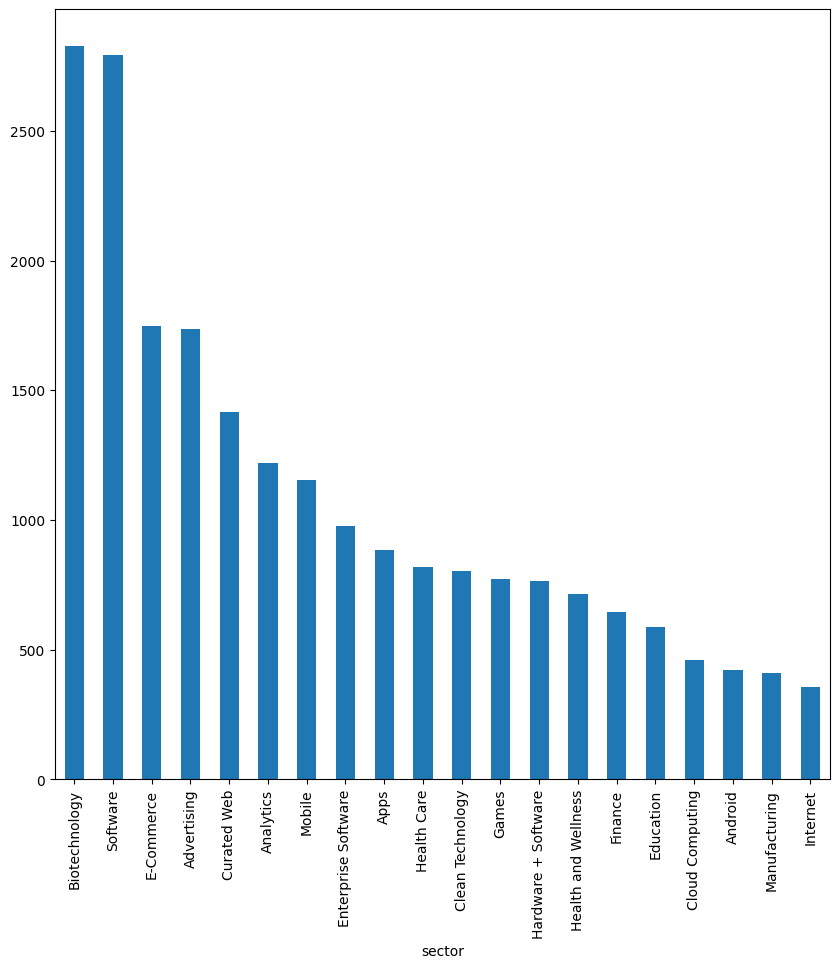

#### #3.2 Análisis Univariante : Numerica
La variable funding_total_usd presentaba unos rangos y variabilidad enormes, por eso he decidido transformar los valores en log base 10, que permite manejarlo mejor, y, como se puede ver, ademas los distribuye segun una normal, aunque se nota una asimetria positiva (cola más larga hacia la derecha).
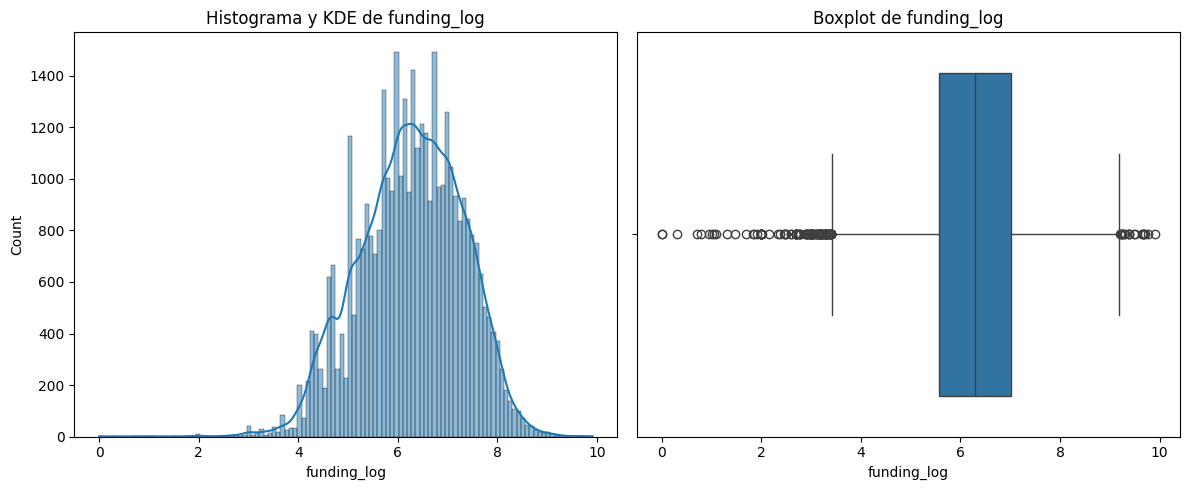
Dispersión: La distribución es bastante amplia, lo que indica que hay una gran variabilidad en los valores de "funding_log".


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mean</th>
      <th>50%</th>
      <th>25%</th>
      <th>75%</th>
      <th>std</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>funding_total_usd</th>
      <td>17932559.45384</td>
      <td>2000000.0</td>
      <td>375000.0</td>
      <td>10427296.75</td>
      <td>101297105.938058</td>
    </tr>
    <tr>
      <th>funding_rounds</th>
      <td>2.052609</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>3.0</td>
      <td>1.577729</td>
    <tr>
      <th>funding_log</th>
      <td>6.267171</td>
      <td>6.30103</td>
      <td>5.574031</td>
      <td>7.018172</td>
      <td>1.032786</td>
    </tr>
  </tbody>
</table>
</div>

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>std</th>
      <th>mean</th>
      <th>Coef_Var</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>funding_total_usd</th>
      <td>101297105.938058</td>
      <td>17932559.45384</td>
      <td>5.648781</td>
    </tr>
    <tr>
      <th>funding_rounds</th>
      <td>1.577729</td>
      <td>2.052609</td>
      <td>0.768646</td>
    </tr>
      <th>funding_log</th>
      <td>1.032786</td>
      <td>6.267171</td>
      <td>0.164793</td>
    </tr>
  </tbody>
</table>
</div>

### #4 Análisis Bivariante : Visual y numerica
  - Categoricas : Moda, Frequencias (Absolutas y Relativas)
  - Numericas : Tendencias Central (mediana, media), rangos, posicion(percentiles-quartiles, IQR, CV), distribucion (histograma, densidad probabilidad)

### Analisis Bivariante con variables Numericas
- ¿las startups que reciben más financiamiento tienen más probabilidades de tener éxito?  SI

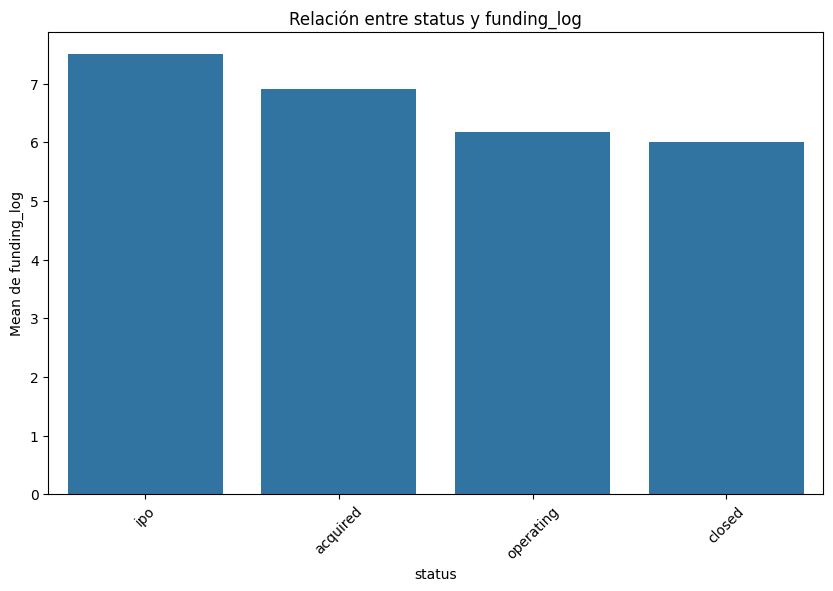


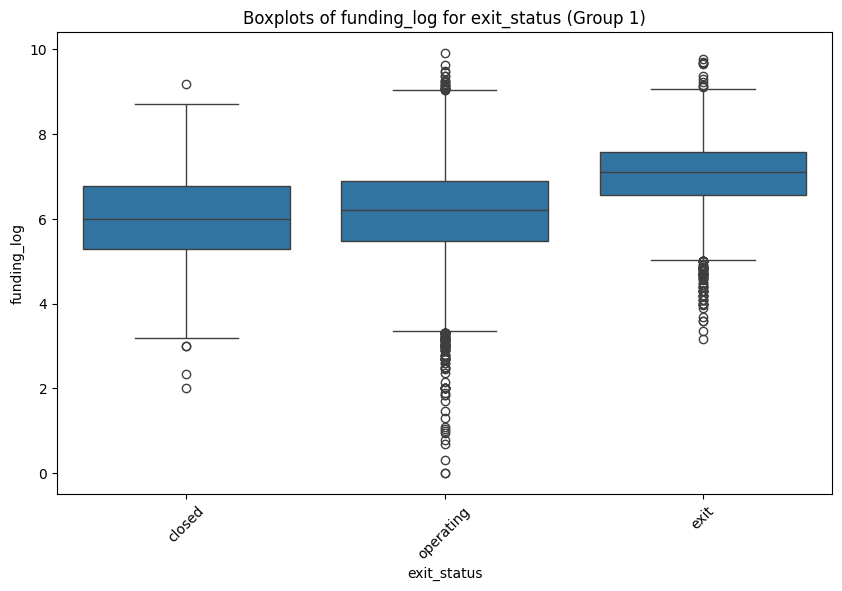

Basándome en estos gráfico, puedo inferir que existe una tendencia a que las startups que reciben más financiamiento tengan más probabilidades de tener éxito (salir del mercado)

Comparación entre status:
- Startups cerradas: Presentan una mediana de financiamiento menor en comparación con las otras dos categorías. En promedio, las startups que cerraron recibieron menos financiamiento.
- Startups operativas: Tienen una mediana de financiamiento similar a las startups que cerraron, pero con una mayor dispersión de los datos. Esto indica que hay startups operativas que recibieron tanto poco como mucho financiamiento.
- Startups que salieron del mercado: salir a bolsa (IPO: Initial Public Offering - Oferta pública de acciones) o ser adquiridos por privados. Presentan la mediana de financiamiento más alta, lo que sugiere que, en promedio, las startups que tuvieron éxito recibieron más financiamiento.

#### Analisis Bivariante con variables Categorica : Analizaremos nuestra variable directora: 
 - exit_status - country y country_code
 - status - sector
 - status - year

ANALISIS STATUS - COUNTRY

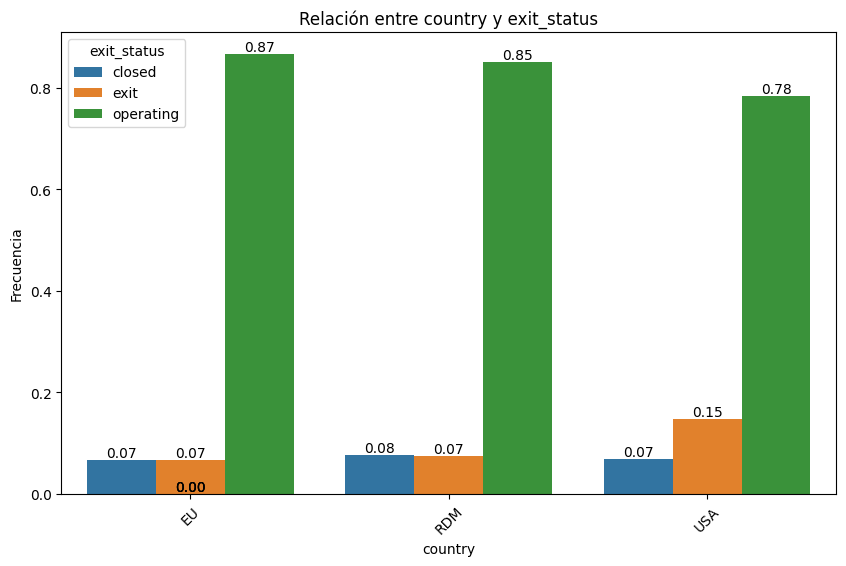
En terminos absolutos, en USA hay la mayor cantidad de statup exitosas y aun operativa pero tambien el mayor numero de startup que han fallido.
En terminos relativos vemos que el ratio de failure es similar en USA-RDM y EU,pero en USA el % de startup exitosa es mas alto.
Puedo pensar que el exito depende del pais.
El test Chi2 abajo aplicado lo confirma. Existe correlacion
- USA es el pais donde mas exito hay en porcentaje, EU y RDM tienen % casi iguales 

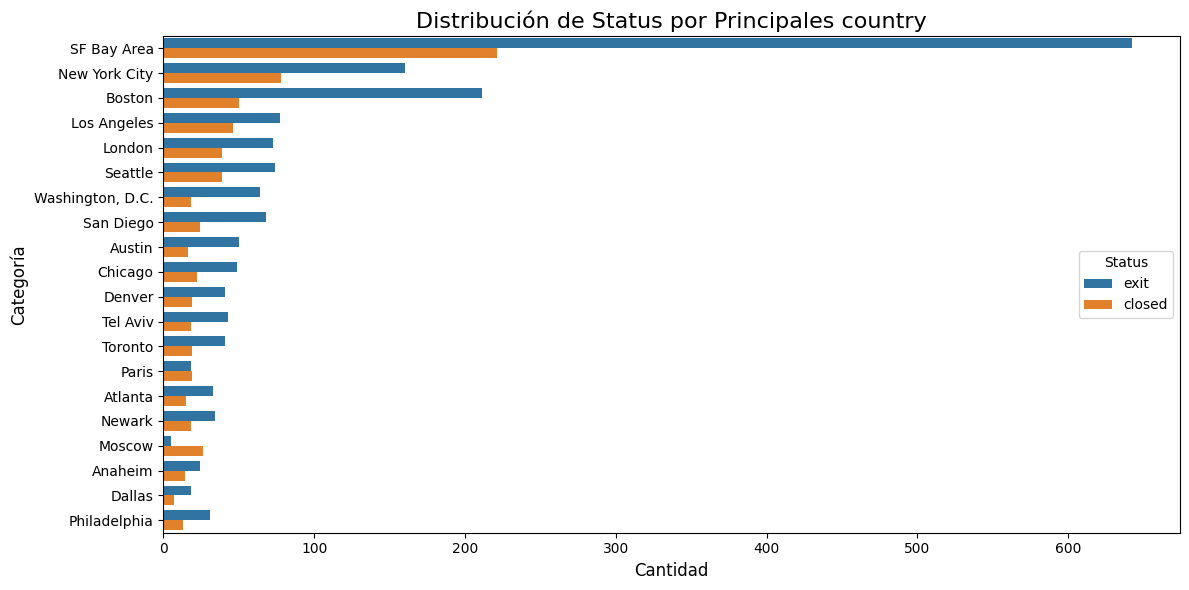
- Analizando las ciudades, se confirma que la mayoria se encuentran en ciudades estadunidenses y que la tendencia es que la mayoria es exitosa.
- Serian de estudiar los casos de Paris y sobretodo Moscow donde la tendencia se invierte y el % de fallido supera el exito.

ANALISIS STATUS SECTOR

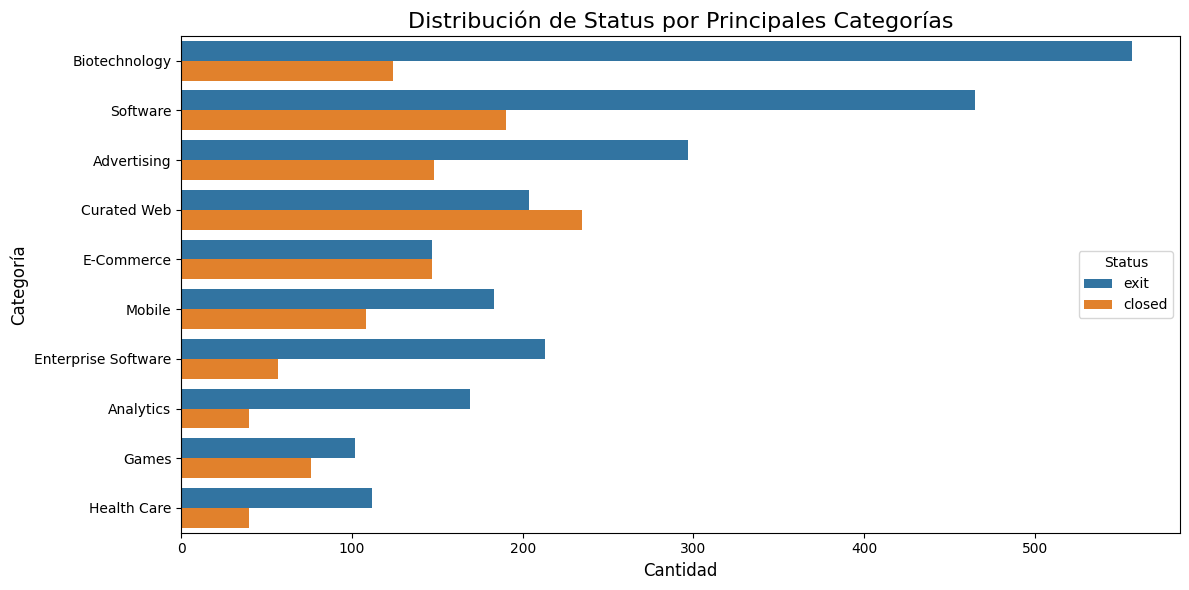

Distribucion de Status por principales sectores
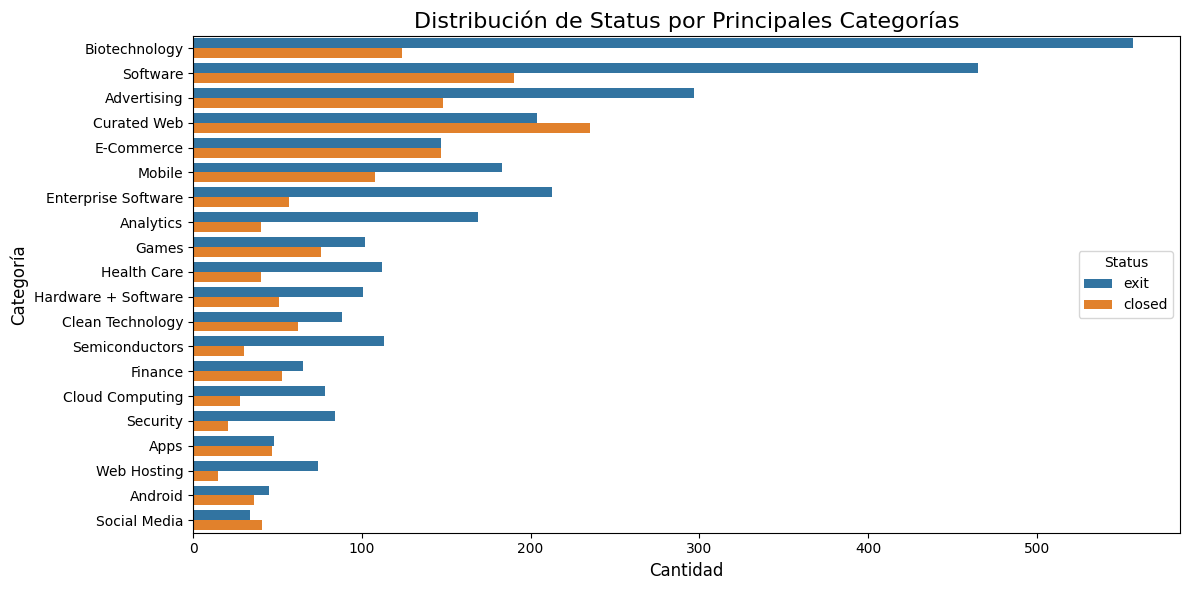

- Los sectores predominantes son Biotechnology, Software, Curated Web, E- commerce, Advertising.
Como esperado casi todo en el sector tech.
Destacar que en Enterprise Software y tambien en Analitycs la tasa de fracaso es mucho menor que en el resto de sectores

Distribucion de sector en Country
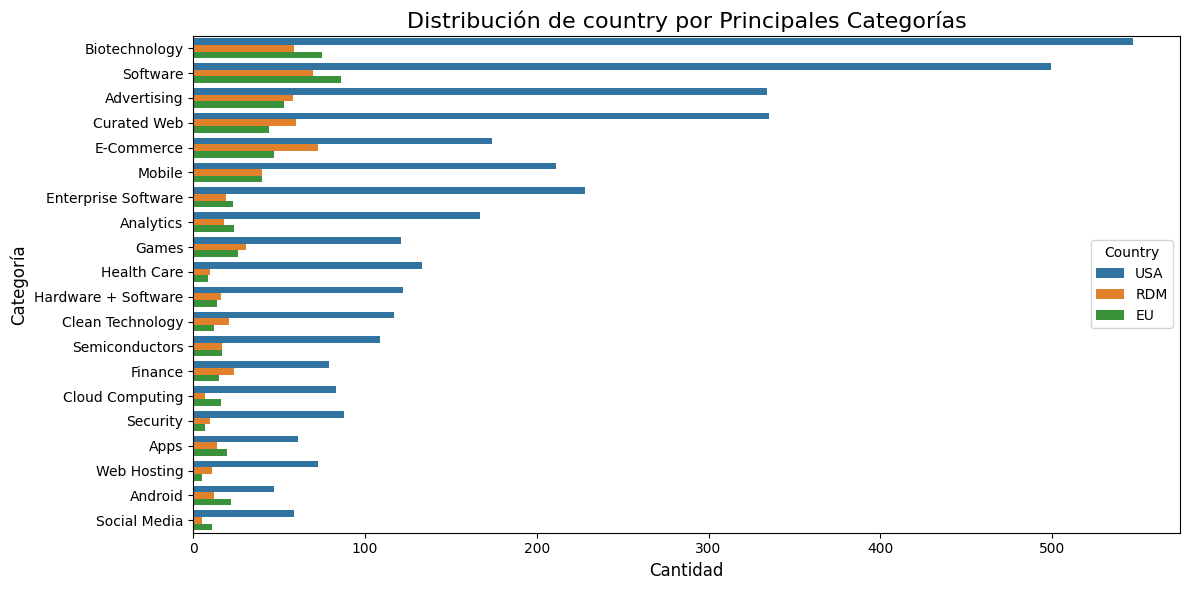
- Analizando country y sector, la tendencia es la misma como esperado, que la mayoria de las startups de exito està en USA.
- Del grafico anterior, fijarse como E-commerce tiene misma % de exito y fracaso y curiosamente, auqnue tambien prevalentemente en USA, muchas startups en este sector han sido creada en el resto del mundo fuera de USAy Europa, que tiene una tasa de fracaso superior a USA

#### Analisis MULTIVARIANTE : entre CATEGORICAS

Análisis entre : exit_status - sector - country

variable target : exit_status

Para analizar la relaccion entre exit_status - sector - country he separado los valores EXIT y CLOSED, creado un diccionario para representar la tasa de succeso o fallido por principales sector y country 

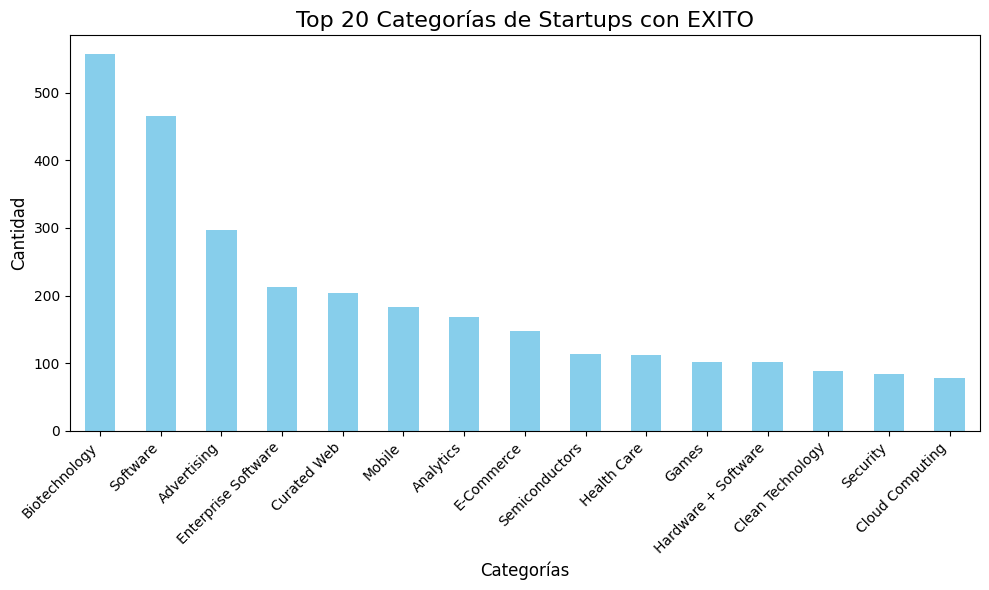
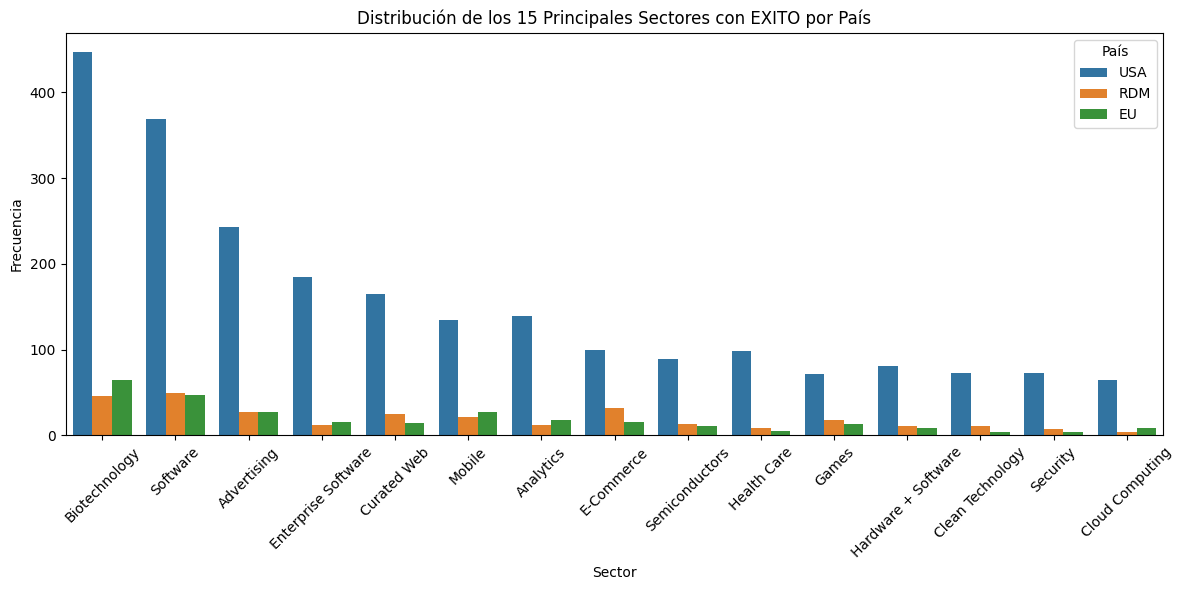

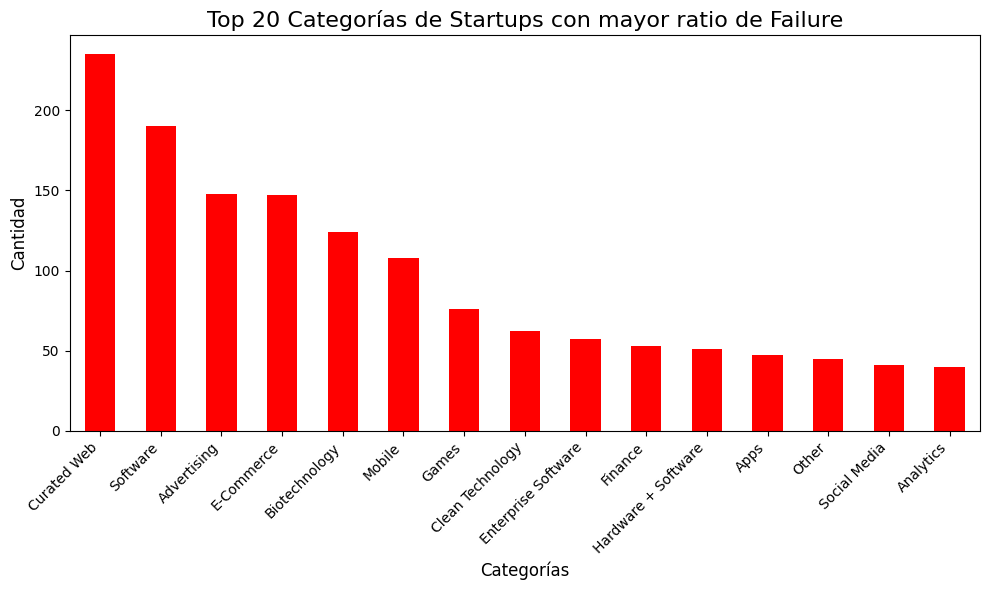
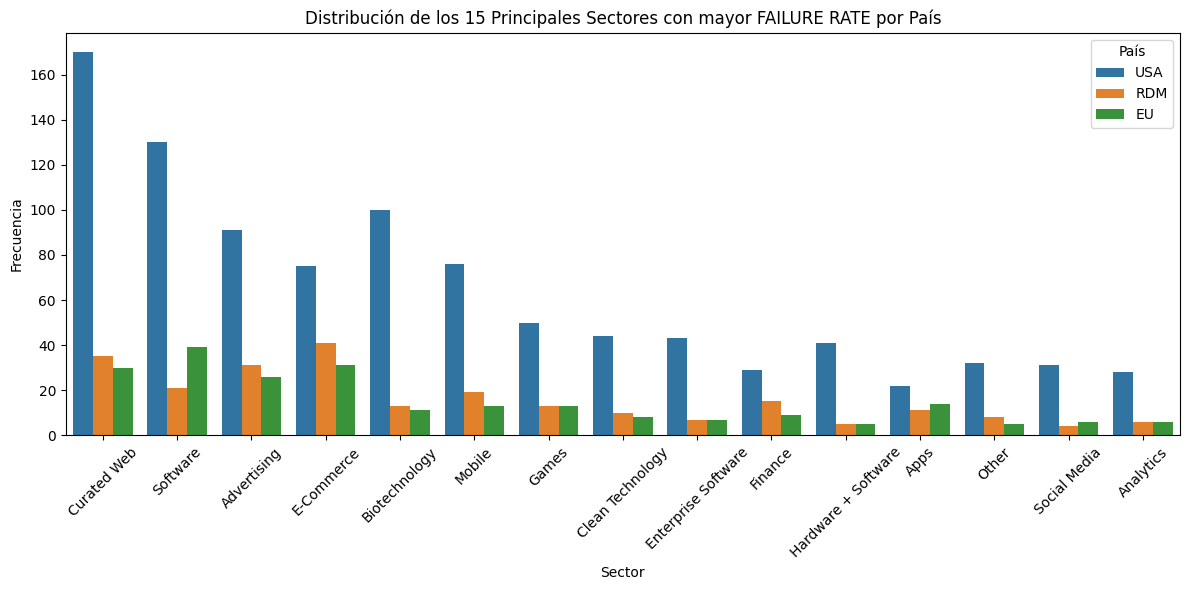 


Los sectores dominantes son que aparecen en los graficos, que tiene un peso relativo similar en USA y en EU, menos significativo en RDM

- Comparación:
 - Sectores con éxito vs. fracaso:
   - Software y Advertising aparecen en ambos gráficos, lo que indica que tienen tanto potencial para el éxito como para el fracaso.
   - Biotechnology está principalmente asociado con el éxito, mientras que Curated Web domina los fracasos.
 - Región:
  -En USA, se concentra la mayor cantidad de empresas tanto exitosas como fallidas, lo que refleja un ecosistema empresarial grande y competitivo.
  -EU y RDM muestran menor intensidad en ambos gráficos, sugiriendo menor participación en general o más cautela en sectores riesgosos.
Conclusión general:
- Sectores tecnológicos (como Software, Curated Web, y Advertising) tienen alta actividad empresarial pero también riesgos asociados.
- Sectores como Biotechnology parecen ser más seguros y orientados al éxito, especialmente en USA.


DISTRIBUCION FINANCIACION STARTUPS EXITOSAS
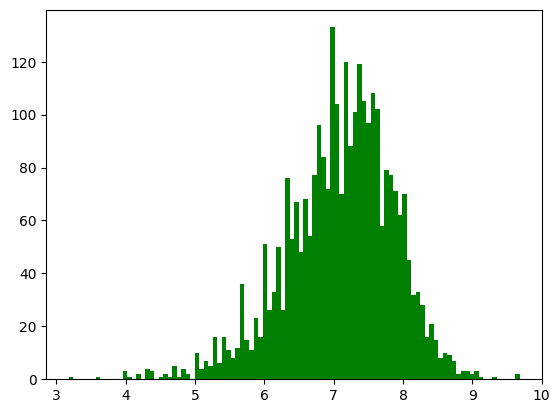


DISTRIBUCION FINANCIACION STARTUPS FRACASADAS
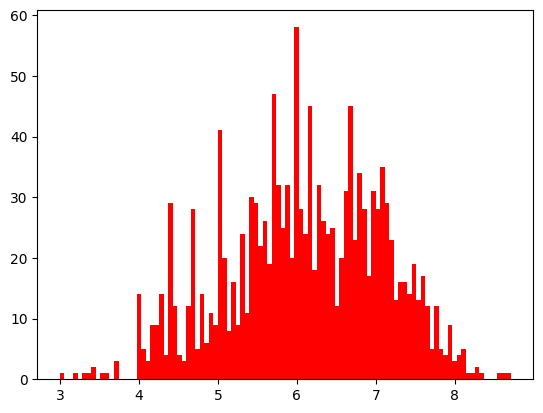

Comparando la distribución del financiamiento para startups exitosas y otro para startups fracasadas, vemos que el histograma de las startups exitosas está ligeramente desplazado hacia la derecha (es decir, muestra valores de financiamiento más altos), entonces  tienden a recibir más financiamiento. 
Sin embargo tambien hay que considera otros factores no objecto de este analisis para determinar la cantidad de financiamiento que se otorga - por ej proyecto actrativos, calidad equipo, innovacion, ect..

CORRELACION ENTRE VARIABLES NUMERICAS

El Heatmap nos dice que hay correlacion, aunque no muy fuerte, entre financiamiento y numeros de rondas
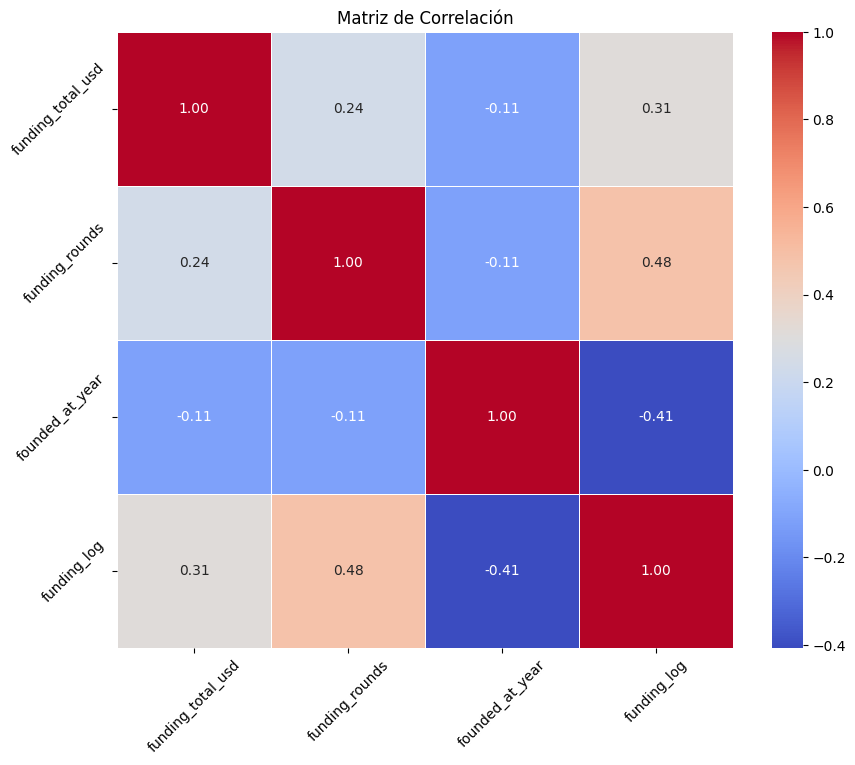


ANALISI DISPERSION ENTRE FINANCIACION Y RONDAS PARA STARTUP EXITOSAS
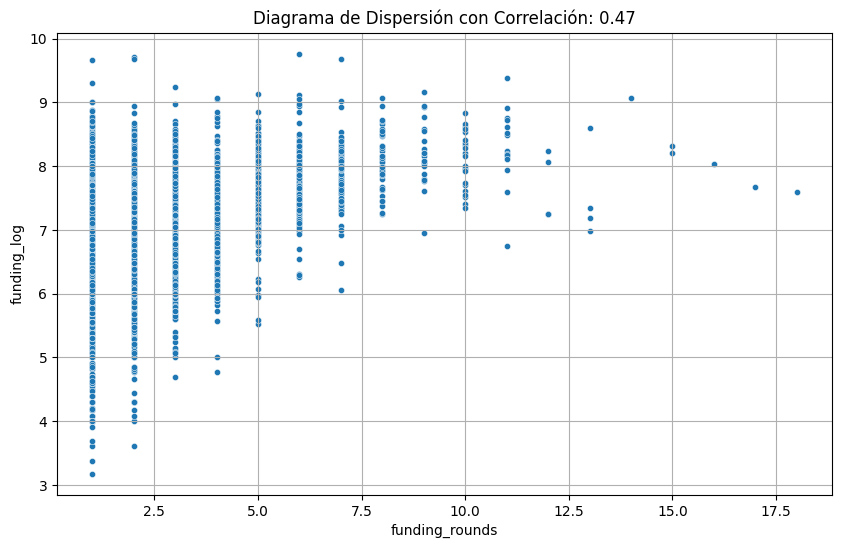

ANALISI DISPERSION ENTRE FINANCIACION Y RONDAS PARA STARTUP QUE HAN FRACASADO
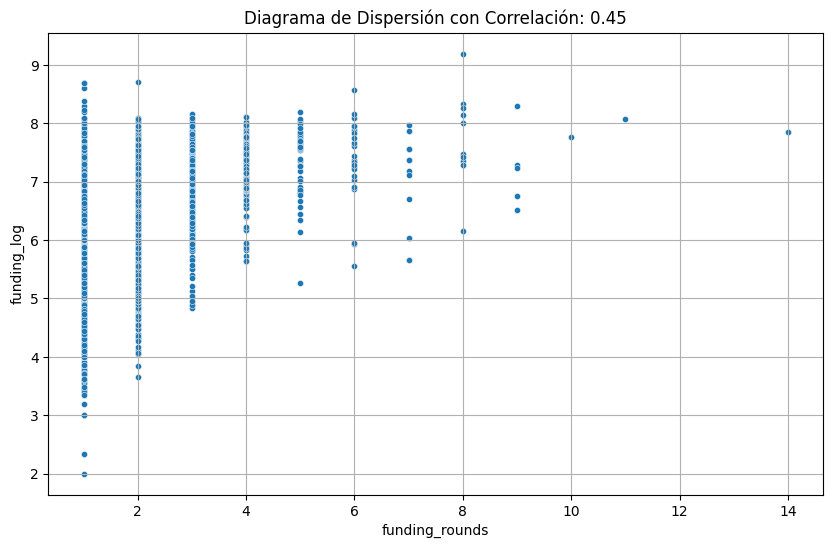